In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['image.cmap'] = 'gray'
matplotlib.rcParams['image.interpolation'] = 'nearest'

import numpy as np
from matplotlib import pyplot as plt

In [2]:
from skimage import io

image = io.imread("/home/hre070/MA/DJI_0095_CLIP.jpg")
#image = io.imread('/home/hre070/MA/dji_full.jpg')
#image = io.imread('/home/hre070/MA/Pics_Kalkofen/DJI_0095.JPG')

print(type(image))
print(image.size)



<class 'numpy.ndarray'>
1644300


## LBP

In [3]:
#IMPORTS
import sys
sys.path.append("/home/hre070/MA/TextureSeg/")
sys.path.append("/home/hre070/MA/TextureSeg/_LBP")
import lbp
from skimage.transform import rotate
from skimage.color import label2rgb
from skimage.color import rgb2gray

im_gray = rgb2gray(image)

print(im_gray.max(), im_gray.min())

0.909417254902 0.00666666666667


In [4]:
# settings for LBP
METHOD = 'default'
radius = 5

n_points = 10 

lbp_img = lbp.local_binary_pattern(im_gray, None, n_points, radius, METHOD)


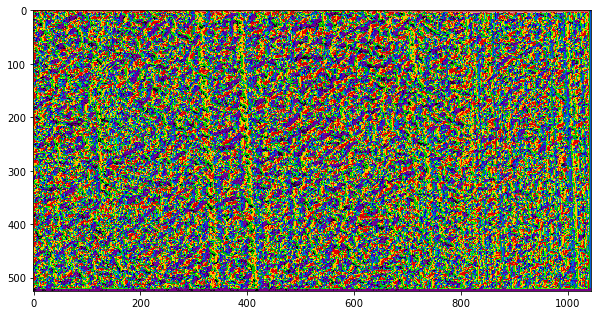

In [5]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp_img, cmap=plt.cm.spectral, alpha=1 )

## Random LBP

In [6]:
import lbp_bins

In [7]:
BINS = lbp_bins.lbp_bins(n_points, METHOD)

lookup = dict(enumerate(BINS))

#print(lookup)
print("="*50)
print(len(np.unique(lbp_img)), len(BINS))

1016 1024


In [8]:
lbp_random = np.vectorize(lookup.__getitem__)(np.random.randint(len(BINS), size=lbp_img.shape))

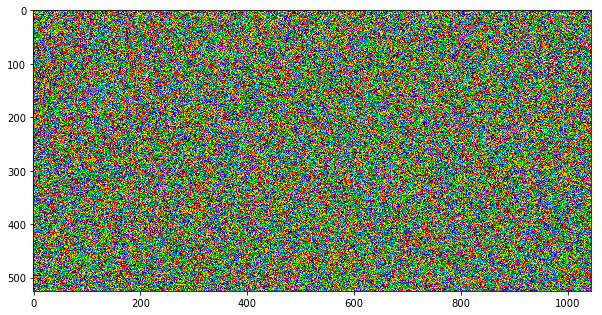

In [9]:
f, ax = plt.subplots(figsize=(10, 10))

#ax.imshow(image)
ax.imshow(lbp_random, cmap=plt.cm.spectral, alpha=1 )

## Correlation

In [10]:
print(np.corrcoef(lbp_img.flat, lbp_random.flat)[0][1])

0.000471549401423


In [11]:
bool_array = lbp_img == lbp

In [12]:
type(bool_array)

bool_array[2, 1]

False